# Regressão com OLS, GD e SGD.

$\bf{Aluno}$: Danilo Alves Oliveira

## Geral para as questões

In [27]:
import numpy as np
import matplotlib.pyplot as plt  # Biblioteca para gerar gráficos

artificial_dataset = np.genfromtxt('./artificial1d.csv', delimiter=',')

## Questão 1
Considere o conjunto de dados disponível em artificial1d.csv organizado em duas colunas, x e y. Seja um modelo de regressão linear para y^ = f(x).

a) Apresente os parâmetros do modelo e o MSE (erro quadrático médio) obtidos pelo algoritmo OLS (mínimos quadrados ordinários). Plote a reta resultante sobre os dados.

O conjunto de dados artificial1d.csv possui 30 amostras com duas colunas, a primeira sendo considerada pertencente ao conjunto domínio $X$ (vetor de entrada) e a segunda sendo considerada como pertencente ao conjunto imagem $y$ (vetor de saída). Inicialmente o dataset é separado nesses dois conjuntos e é adicionado ao vetor $X$ uma coluna de 1 para poder ser resolvido de forma linear analítica. Os vetores ficam da forma:

$\mathbf{X} = [x_{1} x_{2} . . . x_{N}]^{T}$

$\mathbf{y} = [y_{1} y_{2} . . . y_{N}]^{T}$

Em que $N$ é a quantidade de elementos dos vetores que equivale a 30. Esses dois vetores são então aplicados ao método $ \textit{Ordinary least squares (OLS)}$ para obter os pesos do vetor $W$:

$\mathbf{w} = (\mathbf{X}^{T}\mathbf{X})^{-1}\mathbf{X}^{T}\mathbf{y}$

Através do vetor w são calculados os valores de saída $\mathbf{\hat{y}}$ que são armazenados na variável $\textit{y_pred}$:

$\mathbf{\hat{y}} = \mathbf{X}\mathbf{w}$

Com os dados de saída do modelo e saídas do dataset, é calculado a $\textit{mean squared error (MSE)}$:

$$ MSE = \frac{1}{N} \sum_{i=1}^{N}(\mathbf{y} - \mathbf{\hat{y}})^2 $$ 

Parâmetros:  [[0.06761792]
 [1.57486517]]
MSE =  0.21340090132936987


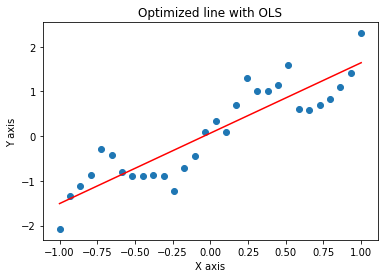

In [40]:
# Separa nos vetores de entrada e saída
X = artificial_dataset[:, [0]]
y = artificial_dataset[:, [1]]

# Adiciona coluna de 1
X = np.c_[np.ones(X.shape[0]), X[:, [0]]]

# Calculo dos parâmetros do modelo
w = np.linalg.inv(X.T @ X) @ X.T @ y
print('Parâmetros: ', w)

# Realiza as predições
y_pred = X @ w

# Calculo do MSE
MSE = np.mean((y - y_pred)**2)
print('MSE = ', MSE)

# Plota os dados e a reta do modelo
X_reta = np.c_[np.ones(100), np.linspace(X[:,1].min(), X[:,1].max(), 100)]
y_reta = X_reta @ w

plt.scatter(X[:,1], y)
plt.plot(X_reta[:,1], y_reta, color='red')
plt.xlabel("X axis")
plt.ylabel("Y axis")
plt.title('Optimized line with OLS')
plt.show()

b) Apresente os parâmetros do modelo, o MSE e a curva de aprendizagem
obtidos pelo algoritmo GD (gradiente descendente). Plote a reta resultante sobre os dados.

Os dados do dataset são separados nos vetores de entrada $\mathbf{X}$ e saída $\mathbf{y}$ e os parâmetros do modelo são apresentados abaixos:

* Os pesos $w_{0}$ e $w_{1}$ são inicializados com zero.
* A taxa de aprendizagem $\alpha $ é utilizado com valor 0.01
* O número de épocas aplicado é de 1000

O algoritmo do GD realiza o cálculo dos parâmetros de pesos do modelo através de iterações buscando minimizar o erro de predição do modelo. A quantidade de iterações é definida pelo número de épocas e a cada iteração são realizados os seguintes procediemntos:
* Cálculo da predição do modelo na iteração:

$$\mathbf{\hat{y}} = w_{0} + w_{1}\mathbf{X}$$

* Cálculo do erro do modelo na iteração:

$$\mathbf{e} =\mathbf{y} - \mathbf{\hat{y}}$$

* Atualização dos parâmetros para N sendo a quantidade de amostras do dataset:

$$w_{0} = w_{0_{t-1}} + \alpha \frac{1}{N} \sum_{i=1}^{N} e_{i}$$

$$w_{1} = w_{1_{t-1}} + \alpha \frac{1}{N} \sum_{i=1}^{N} e_{i}x_{i}$$

* Nova predição com os pesos atualizados e cálculo do MSE:

$$\mathbf{\hat{y}} = w_{0} + w_{1}\mathbf{X}$$

$$ MSE = \frac{1}{N} \sum_{i=1}^{N}(\mathbf{y} - \mathbf{\hat{y}})^2 $$

A cada iteração os valores dos MSEs são armazenados em um vetor $\it{erros}$ para ser plotado e visualizar o histórico de alterações da MSE ao longo das épocas. 

MSE final =  0.21410208189106827
Parâmetros: w_0 =  0.06761500548818634  w_1 =  1.530504947053618


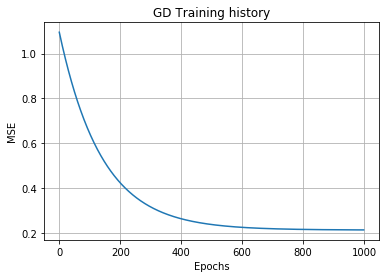

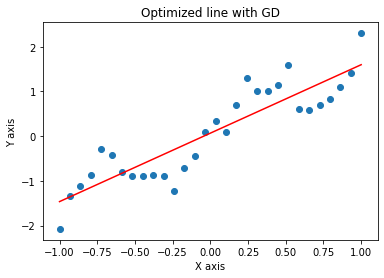

In [17]:
# Separa nos vetores de entrada e saída
X = artificial_dataset[:, [0]]
y = artificial_dataset[:, [1]]

# valores de alpha, pesos e épocas
alpha = 0.01
w_0, w_1 = 0, 0
epochs = 1000
erros = []

# iterações
for i in range(0, epochs):
    
    # Calculo da predição e do erro
    y_pred = w_0 + w_1 * X
    e = y - y_pred
    
    # Atualiza parâmetros
    w_0 = w_0 + alpha * np.mean(e)
    w_1 = w_1 + alpha * np.mean(e*X)
   
    #Calculo do MSE
    y_pred = w_0 + w_1 * X
    
    MSE = np.mean((y - y_pred)**2)
    erros.append(MSE)

# Apresentação dos dados
print('MSE final = ', MSE)
print('Parâmetros: w_0 = ', w_0, ' w_1 = ', w_1)

# Plotagem da curva de aprendizagem 
plt.plot(range(0,epochs), erros)
plt.xlabel("Epochs")
plt.title('GD Training history')
plt.ylabel("MSE")
plt.grid(True)
plt.show()

# Plota os dados e a reta do modelo
X_reta = np.c_[np.ones(100), np.linspace(X.min(), X.max(), 100)]
y_reta = w_0 + w_1 * X_reta

plt.scatter(X, y)
plt.plot(X_reta, y_reta, color='red')
plt.title('Optimized line with GD')
plt.xlabel("X axis")
plt.ylabel("Y axis")
plt.show()

c) Apresente os parâmetros do modelo, o MSE e a curva de aprendizagem
obtidos pelo algoritmo SGD (gradiente descendente estocástico).
Plote a reta resultante sobre os dados.

Os dados do dataset são separados nos vetores de entrada $\mathbf{X}$ e saída $\mathbf{y}$ e os parâmetros do modelo são os mesmos utilizados no GD para realizar uma comparação entre os dois em seguida. O algoritmo $\textit{Stochastic Gradient Descent (SGD)}$ é semelhante so GD, modificando que a cada época os dados são permutados aleatóriamente e os parâmetros $w_{0}$ e $w_{1}$ são atualizados a cada amostra do dataset para cada época. Para cada época são realizados os seguintes passos:

* Permutação aleatória de um vetor $\it{indices}$ correspondendo a cada amostra do dataset
* Percorrer todos os índices $\it{j}$ dentro do vetor $\it{indices}$ realizando os procediemntos:
    * Cálculo da predição para a amostra $\it{j}$:
    
    $$ \hat{y} = w_{0} + w_{1}X_{j}$$
    
    * Cálculo do erro para a amostra $\it{j}$:
    
    $$ e_{j} = y_{j} - \hat{y} $$
    
    * Atualização dos pesos:
    
    $$w_{0} = w_{0_{t-1}} + \alpha e_{j}$$
    
    $$w_{1} = w_{1_{t-1}} + \alpha e_{j} X_{j}$$
* Após percorrido todos as amostras aleatóriamente e atualizado os pesos a cada amostra, é realizada uma nova predição com os pesos atualizados e calculado o MSE da época:

$$\mathbf{\hat{y}} = w_{0} + w_{1}\mathbf{X}$$

$$ MSE = \frac{1}{N} \sum_{i=1}^{N}(\mathbf{y} - \mathbf{\hat{y}})^2 $$

A cada época os valores dos MSEs são armazenados em um vetor $\it{mse\_erros}$ para ser plotado e visualizar o histórico de alterações da MSE ao longo das épocas. 

MSE final =  0.21340090475918796
Parâmetros: w_0 =  [0.06765568]  w_1 =  [1.57479017]


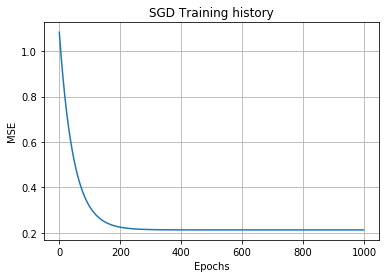

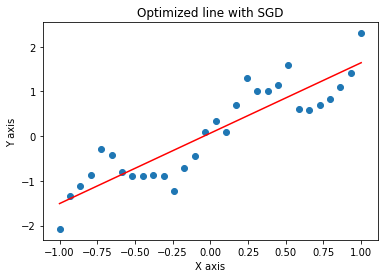

In [18]:
# Separa nos vetores de entrada e saída
X = artificial_dataset[:, [0]]
y = artificial_dataset[:, [1]]

# valores de alpha, pesos e épocas
alpha = 0.001
w_0, w_1 = 0, 0
epochs = 1000
mse_erros = []

# iterações
for i in range(0, epochs):
    
    # Permuta dos dados e reinicia o vetor de erros da época
    indices = np.random.permutation(X.shape[0])
    
    # Percorre todos os elementos
    for j in indices:
        
        # Calculo da predição e do erro
        y_pred = w_0 + w_1 * X[j]
        e = y[j] - y_pred
    
        # Atualiza parâmetros
        w_0 = w_0 + alpha * e
        w_1 = w_1 + alpha * e * X[j]
        
    #Calculo do erro
    y_pred = w_0 + w_1 * X
        
    MSE = np.mean((y - y_pred)**2)
    mse_erros.append(MSE)
    

# Apresentação dos dados
print('MSE final = ', MSE)
print('Parâmetros: w_0 = ', w_0, ' w_1 = ', w_1)

# Plotagem da curva de aprendizagem 
plt.title('SGD Training history')
plt.plot(mse_erros)
plt.xlabel("Epochs")
plt.ylabel("MSE")
plt.grid(True)
plt.show()

# Plota os dados e a reta do modelo
X_reta = np.c_[np.ones(100), np.linspace(X.min(), X.max(), 100)]
y_reta = w_0 + w_1 * X_reta

plt.scatter(X, y)
plt.plot(X_reta, y_reta, color='red')
plt.title('Optimized line with SGD')
plt.xlabel("X axis")
plt.ylabel("Y axis")
plt.show()

Comparando os históricos de treinamento entre o GD e o SGD:

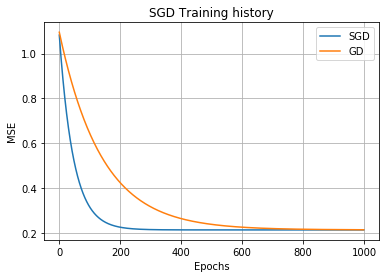

In [19]:
# Plotagem da curva de aprendizagem do GD e SGD

plt.title('SGD Training history')
plt.plot(mse_erros, label='SGD')
plt.plot(erros, label='GD')
plt.xlabel("Epochs")
plt.ylabel("MSE")
plt.legend()
plt.grid(True)
plt.show()

Observa-se que o SGD apresenta convergência antecipada, estabilizando por volta da MSE com 0.2 em aproximadamente 200 épocas, enquando o GD consegue estabilizar nesse valor aproximadamente na época 600.

## Questão 2
Considere o conjunto de dados disponível em boston.csv, organizado em 14
colunas, sendo as 13 primeiras colunas os atributos e a última coluna a saída.
Os 13 atributos são usados na predição de preços de casas em Boston na década
de 1970. Maiores detalhes sobre os dados podem ser conferidos em https://
scikit-learn.org/stable/datasets/toy_dataset.html#boston-dataset.

a) Aleatoriamente, divida o conjunto de dados em treino (80%) e teste (20%).

In [2]:
# Leitura do dataset
boston_dataset = np.genfromtxt('./boston.csv', delimiter=',')

# Para reprodutibilidade
np.random.seed(97)

# Permutacão aleatória
boston_dataset = np.random.permutation(boston_dataset)

# Divisão em treino e teste
train_rate = 0.8
[rows, cols] = boston_dataset.shape

X_train, y_train = boston_dataset[0:int(np.round(rows*train_rate)), 0:cols-2], boston_dataset[0:int(np.round(rows*train_rate)), [cols-1]]
X_test, y_test = boston_dataset[int(np.round(rows*train_rate)):rows, 0:cols-2], boston_dataset[int(np.round(rows*train_rate)):rows, [cols-1]]

b) Treine 11 modelos de regressão polinomial, com ordens de 1 a 11.

Os modelos de regressão polinomial são obtidos através de transformações não-lineares dos atributos concatenados aos atributos originais de forma a criar novos atributos da base. Dessa forma, para um polinômio de ordem $\it{P}$ os atributos são modificados da forma:

$$ \mathbf{x}_{i} = [1 x_{i} x_{i}^2 . . . x_{i}^{P}]^T $$.

Com o aumento do número de atributos, os pesos também devem manter dimensões correspondentes, logo:

$$ \mathbf{w} = [w_{0} w_{1} w_{2} . . . w_{P}]^T $$.

No algoritmo desenvolvido, inicialmente os dados originais do dataset são normalizados através da técnica de mínimo e máximo para ficarem no intervalo de $[0, 1]$:

$$ \mathbf{y} \leftarrow \frac{\mathbf{y} - y_{min}}{y_{max}-y_{min}} $$

$$ [\mathbf{X}]_{d} \leftarrow \frac{[\mathbf{X}]_{d} - [x_{min}]_d}{[x_{max}]_{d} - [x_{min}]_{d}} $$

Os valores de X são normalizados em relação a cada coluna, correspondendo aos atributos. São normalizados os conjuntos $\mathbf{X}$ e $\mathbf{y}$ do treino e somente o $\mathbf{X}$ do teste. Após a normalização, são adicionados colunas de 1 no vetor $\mathbf{X}$ de treino e teste para as multiplicações lineares. Os parâmetros do GD utilizados são $\alpha = 0.01$ e Epócas = 1000. Após isso, as iterações dos polinômios são iniciadas, variando de acordo com o grau do polinômio que nesse experimento é de 1 a 11, em cada iteração são feitos os seguintes passos:

* Inicializa vetores vazios ($\textit{X_train_norm_poly}$, $\textit{X_test_norm_poly}$) para armazerem os atributos transformados pelos polinômios

* Realiza um loop para adicionar as colunas dos polinômios até o grau correspondente na iteração

* Inicializa o vetor de pesos $W$ para ter a mesma dimensão de colunas do $\textit{X_train_norm_poly}$ e possuir valores 0.

* Inicia o processo de iteração do GD para atualização dos pesos de forma linear analítica, realizando a cada iteração de épocas o seguintes procedimentos:

    * Cálculo de predição, considerando $\textit{X_train_norm_poly}$ como $\mathbf{X}_{train}$:
    
    $$ \mathbf{\hat{y}} = \mathbf{X}_{train}\mathbf{W} $$
    
    * Cálculo do erro:
    
    $$\mathbf{e} =\mathbf{y}_{train} - \mathbf{\hat{y}}$$
    
    * Atualização dos pesos, para N sendo a quantidade de amostras:
    
    $$ \mathbf{W} = \mathbf{W}_{t-1} + \frac{\alpha \mathbf{X}_{train}^T \mathbf{e}}{N} $$
    
* Após finalizadas todas as iterações de épocas de treinamento, são calculadas as predições com os novos pesos para os vetores $X_{train}$ e $X_{test}$ e calculado o $\textit{Root-mean-square error}$ para cada grupo de acordo com a equação abaixo:

$$ RMSE = \sqrt{ \frac{\sum_{i=1}^{N} (y_i - \hat{y}_i)^2}{N} } $$

* As RMSE's de treino e teste são armazenadas nos vetores $\textit{rmse_train}$ e $\textit{rmse_test}$ respectivamente para posteriormente vizualizar os históricos.

* Esses passos se repetem para cada grau de polinômio.
    

C:\Users\danil\anaconda3\lib\site-packages\ipykernel_launcher.py:39: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.


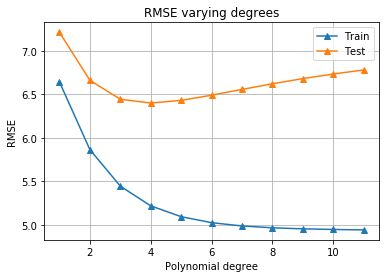

In [20]:
# Os modelos de regressão polinomial serão treinados com o GD

# Normaliza os dados de treino
X_train_norm = (X_train - X_train.min(axis=0)) / (X_train.max(axis=0) - X_train.min(axis=0))
y_train_norm = (y_train - y_train.min()) / (y_train.max() - y_train.min())

#Normaliza as entradas de teste
X_test_norm = (X_test - X_test.min(axis=0)) / (X_test.max(axis=0) - X_test.min(axis=0))

# Adiciona coluna de 1
X_train_norm = np.c_[np.ones(X_train_norm.shape[0]), X_train_norm[:, :]]
X_test_norm = np.c_[np.ones(X_test_norm.shape[0]), X_test_norm[:, :]]

# valores de alpha, pesos, épocas e vetor de erros
alpha = 0.01
epochs = 1000

rmse_train = []
rmse_test = []
degrees = 11

# Para cada grau de polinômio
for i in range(1, degrees+1):
    
   
    X_train_norm_poly = []
    X_test_norm_poly = []
    
    
    # potencializa as colunas de acordo com o grau
    for j in range(1, i+1):
        X_train_degree = X_train_norm ** j
        X_test_degree = X_test_norm ** j
        
        # Adiciona as colunas do novo grau na variável
        if X_train_norm_poly != []:
            X_train_norm_poly = np.c_[X_train_norm_poly, X_train_degree]
            X_test_norm_poly = np.c_[X_test_norm_poly, X_test_degree]
        else:
            X_train_norm_poly = X_train_norm.copy()
            X_test_norm_poly = X_test_norm.copy()
    
    # Redimensiona o tamanho do vetor pesos
    W = np.zeros((X_train_norm_poly.shape[1], 1))
     
    for k in range(0, epochs):
    
        # Calculo da predição e do erro
        y_pred = X_train_norm_poly @ W
        e = y_train_norm - y_pred

        # Atualiza parâmetros
        W += alpha * X_train_norm_poly.T @ e / X_train_norm_poly.shape[0]
    
    #Realiza a predição de treino e cálcula a RMSE
    y_pred = X_train_norm_poly @ W
    RMSE_train = np.sqrt(np.mean((y_train - (y_pred * (y_train.max() - y_train.min()) + y_train.min()))**2))
        
    #Realiza a predição de teste e cálcula a RMSE
    y_pred = X_test_norm_poly @ W
    RMSE_test = np.sqrt(np.mean((y_test - (y_pred * (y_train.max() - y_train.min()) + y_train.min()))**2))
    
    rmse_train.append(RMSE_train)
    rmse_test.append(RMSE_test)
    
    
# Plotagem dos resultados dos polinômios
plt.plot(range(1, degrees+1), rmse_train, '-^', label='Train')
plt.plot(range(1, degrees+1), rmse_test, '-^', label='Test')
plt.title('RMSE varying degrees')
plt.xlabel("Polynomial degree")
plt.ylabel("RMSE")   
plt.grid(True)
plt.legend()
plt.show()

d) Repita os 2 itens anteriores incluindo um termo de regularização L2 com fator λ = 0:01.

Nesse algoritmo são implementados os mesmo passos do apresentado anteriormente, as modificações são em relação ao cálculo do erro de treinamento e atualização dos pesos. O erro de treinamento é calculado de duas formas, com e sem regularização. O erro sem regularização é utilizado para atualização do $W_{0}$ e o erro com regularização é utilizado para atualização dos demais. A equação do erro com o ajuste de regularização L2 é apresentado abaixo:

$$ \mathbf{e}_{L2} = (\mathbf{y} - \mathbf{\hat{y}}) + \frac{\lambda}{2} \sum_{d=1}^{D} W_{d}^2  $$

O ajuste dos pesos no treinamento também é modificado adicionando o termo da regularização L2 para os pesos com exceção do $W_0$:

$$ \mathbf{W} = \mathbf{W}_{t-1} + \alpha \left [ \frac{\mathbf{X}_{train}^T \mathbf{e}_{L2}}{N} - \lambda \mathbf{W}_{t-1} \right ] $$

O ajuste do $W_0$ continua como no GD clássico:

$$W_{0} = W_{0_{t-1}} + \alpha \frac{1}{N} \sum_{i=1}^{N} e_{i}$$

C:\Users\danil\anaconda3\lib\site-packages\ipykernel_launcher.py:37: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.


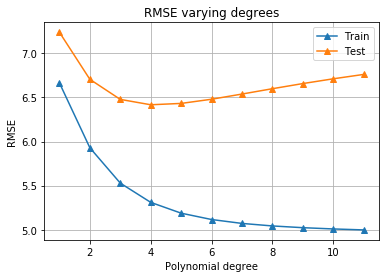

In [26]:
# Os modelos de regressão polinomial serão treinados com o GD

# Normaliza os dados de treino
X_train_norm = (X_train - X_train.min(axis=0)) / (X_train.max(axis=0) - X_train.min(axis=0))
y_train_norm = (y_train - y_train.min()) / (y_train.max() - y_train.min())

#Normaliza as entradas de teste
X_test_norm = (X_test - X_test.min(axis=0)) / (X_test.max(axis=0) - X_test.min(axis=0))

# valores de alpha, pesos, épocas e vetor de erros
alpha = 0.01
epochs = 1000
lamb = 0.01

rmse_train = []
rmse_test_l2 = []
degrees = 11

N_x = X_train.shape[0]


# Para cada grau de polinômio
for i in range(1, degrees+1):
    
    erros_train = []
    erros_test = []
    X_train_norm_poly = []
    X_test_norm_poly = []
    
    
    # potencializa as colunas de acordo com o grau
    for j in range(1, i+1):
        X_train_degree = X_train_norm ** j
        X_test_degree = X_test_norm ** j
        
        # Adiciona as colunas do novo grau na variável
        if X_train_norm_poly != []:
            X_train_norm_poly = np.c_[X_train_norm_poly, X_train_degree]
            X_test_norm_poly = np.c_[X_test_norm_poly, X_test_degree]
        else:
            X_train_norm_poly = X_train_norm.copy()
            X_test_norm_poly = X_test_norm.copy()
            
    # Adiciona coluna de 1
    X_train_norm_poly = np.c_[np.ones(X_train_norm_poly.shape[0]), X_train_norm_poly[:, :]]
    X_test_norm_poly = np.c_[np.ones(X_test_norm_poly.shape[0]), X_test_norm_poly[:, :]]
    
    # Redimensiona o tamanho do vetor pesos
    W = np.zeros((X_train_norm_poly.shape[1], 1))
     
    for k in range(0, epochs):
        
    
        # Calculo da predição e do erro
        y_pred = X_train_norm_poly @ W
        e = y_train_norm - y_pred
        e_reg = e + (lamb/2)*np.sum(W**2)
        
        # Atualiza demais parâmetros
        W += alpha * (((X_train_norm_poly.T @ e_reg) / X_train_norm_poly.shape[0]) - lamb * W)
        
        # Atualiza parâmetro W_0 sem regularização
        W[0] = W[0] + alpha * np.mean(e)
    
    #Calculo do quadrado do erro e armazenamento para cálculo do RMSE quando finalizar as iterações
    y_pred = X_train_norm_poly @ W
    RMSE_train = np.sqrt(np.mean((y_train - (y_pred * (y_train.max() - y_train.min()) + y_train.min()))**2))
        
    #Calculo do quadrado do erro e armazenamento para cálculo do RMSE quando finalizar as iterações
    y_pred = X_test_norm_poly @ W
    RMSE_test = np.sqrt(np.mean((y_test - (y_pred * (y_train.max() - y_train.min()) + y_train.min()))**2))
    
    rmse_train.append(RMSE_train)
    rmse_test_l2.append(RMSE_test)
    
    
# Plotagem dos resultados dos polinômios
plt.plot(range(1, degrees+1), rmse_train, '-^', label='Train')
plt.plot(range(1, degrees+1), rmse_test_l2, '-^', label='Test')
plt.title('RMSE varying degrees')
plt.xlabel("Polynomial degree")
plt.ylabel("RMSE")   
plt.grid(True)
plt.legend()
plt.show()

Comparando as curvas de aprendizagem no mesmo grupo de teste com e sem a regularização L2.

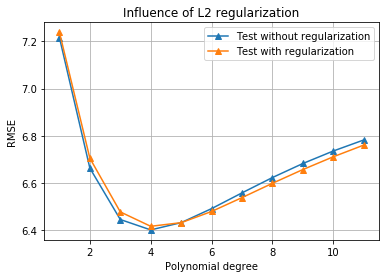

In [29]:
# Comprando os resultados com e sem o parâmetro de regularização L2

plt.plot(range(1, degrees+1), rmse_test, '-^', label='Test without regularization')
plt.plot(range(1, degrees+1), rmse_test_l2, '-^', label='Test with regularization')
plt.title('Influence of L2 regularization')
plt.xlabel("Polynomial degree")
plt.ylabel("RMSE")   
plt.grid(True)
plt.legend()
plt.show()

Observa-se que o parâmetro de regularização L2 possibilitou uma redução da RMSE para os polinômios de grau superior a 4, o que significa uma leve redução do overfitting, pois após o polinômio de 4º grau o RMSE de treino apresenta crescimento contínuo característico de overfitting. Observou-se também através de experimentos que aumentando o valor do parâmetro $\lambda$ para valores maiores que 0.1 o efeito de overfitting é quase que completamente removido.